In [126]:
%load_ext autoreload
%autoreload 2

import sys 
sys.path.append('/global/project/projectdirs/desi/mocks/bgs/MXXL/one_percent')
import footprint 
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
#import mxxl_real
from astropy.table import Table
from corr_func_tools import calc_wtheta,create_axes
import mxxl_real2
import S4Mock_io
from   desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
mxxl = mxxl_real2.read_mxxl_real()
"""

for i in range(36):
    mxxl_temp=mxxl[(mxxl['NMOCK']==i)]
    plt.scatter(mxxl_temp['RA'][:1000000], mxxl_temp['DEC'][:1000000],s=10, edgecolor="None")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.title('MXXL')
"""


'\n\nfor i in range(36):\n    mxxl_temp=mxxl[(mxxl[\'NMOCK\']==i)]\n    plt.scatter(mxxl_temp[\'RA\'][:1000000], mxxl_temp[\'DEC\'][:1000000],s=10, edgecolor="None")\n    plt.xlabel(\'RA\')\n    plt.ylabel(\'DEC\')\n    plt.title(\'MXXL\')\n'

In [128]:
rand = mxxl_real2.read_mxxl_real_rand()

"""
for i in range(36):
    rand_temp=rand[(rand['NMOCK']==i)]
    plt.scatter(rand_temp['RA'][:1000000], rand_temp['DEC'][:1000000],s=10, edgecolor="None")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.title('Randoms')
"""

'\nfor i in range(36):\n    rand_temp=rand[(rand[\'NMOCK\']==i)]\n    plt.scatter(rand_temp[\'RA\'][:1000000], rand_temp[\'DEC\'][:1000000],s=10, edgecolor="None")\n    plt.xlabel(\'RA\')\n    plt.ylabel(\'DEC\')\n    plt.title(\'Randoms\')\n'

In [130]:
len(mxxl)

115586643

In [6]:
mxxl = mxxl[(mxxl['APP_MAG']<19.5)]
#19.5952

In [51]:
wtheta_all = []
for i in range(36):
    print(i)
    
    mxxl_n = mxxl[(mxxl['NMOCK']==i)]
    rand_n = rand[(rand['NMOCK']==i)]
    wtheta_all.append(calc_wtheta(mxxl_n['RA'],mxxl_n['DEC'],rand_n['RA'],rand_n['DEC']))
wtheta_all = np.c_[wtheta_all]

0


KeyError: 'NMOCK'

In [8]:
#np.save('wtheta_all',wtheta_all)
wtheta_all = np.load('wtheta_all.npy')

In [9]:
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)

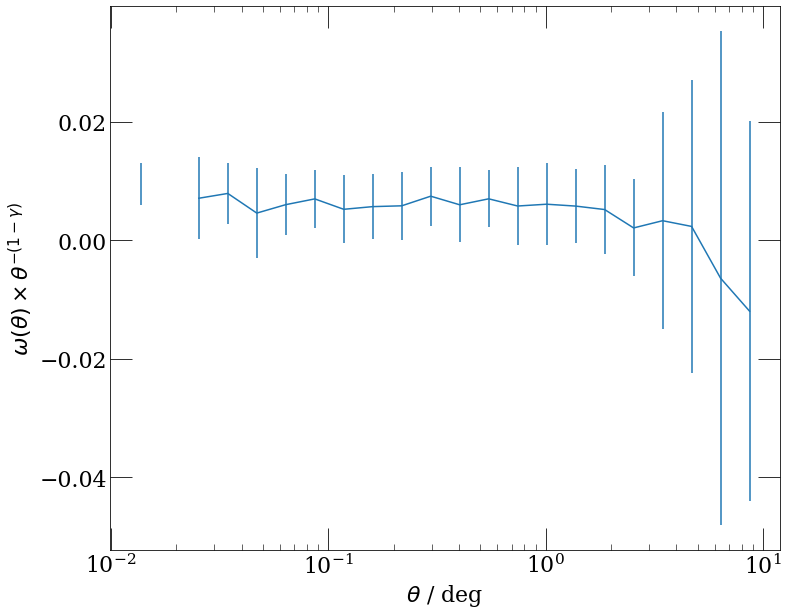

In [10]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

x_axis,y_axis = create_axes(mean)
x_axis,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis,y_axis,yerr=y_axis_err)

plt.xlabel(r'$\theta$ / deg')
plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xscale('log')
#plt.yscale('log')

In [ ]:
#wtheta_mock = []

In [106]:
mock = S4Mock_io.read_mxxl(small=False)
bright_mock = mock[(mock['APP_MAG'] <= 19.5)]

"""
ra_rand = np.random.uniform(240,260,1000000)
dec_rand = np.random.uniform(10,30,1000000)
"""


'\nra_rand = np.random.uniform(240,260,1000000)\ndec_rand = np.random.uniform(10,30,1000000)\n'

In [107]:
bright_mock =bright_mock[(bright_mock['RA']>220)&(bright_mock['RA']<240)& (bright_mock['DEC']>10)&(bright_mock['DEC']<30)]

In [108]:
Ngal = Ngal=30000000
ra_rand = np.random.rand(Ngal) * 360
sin_dec = np.random.rand(Ngal) * 2 - 1
dec_rand = np.arcsin(sin_dec) * 180/np.pi

ra_rand = ra_rand.astype('float32')
dec_rand = dec_rand.astype('float32')

rand = Table(np.c_[ra_rand, dec_rand], names=['RA', 'DEC'],dtype=[np.float32,np.float32])

In [109]:
rand = rand[(rand['RA']>220)&(rand['RA']<240)& (rand['DEC']>10)&(rand['DEC']<30)]

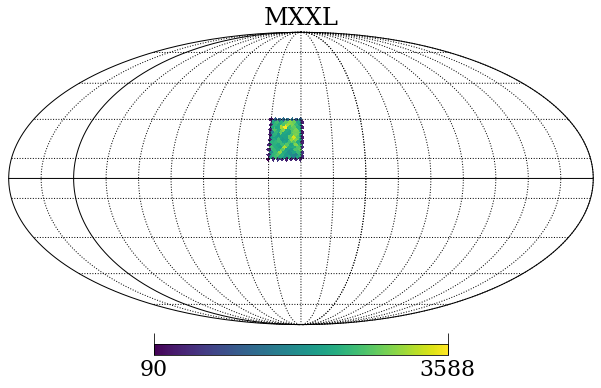

In [110]:
import geometry
import healpy as hp
target_pixel_density = geometry.targ_hpmap(bright_mock)
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='MXXL')
hp.graticule(dpar=5, dmer=5)

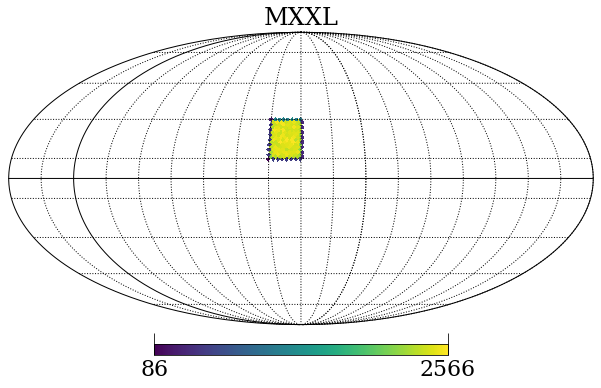

In [111]:
import geometry
import healpy as hp
target_pixel_density = geometry.targ_hpmap(rand)
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='MXXL')
hp.graticule(dpar=5, dmer=5)

In [112]:
p = calc_wtheta(bright_mock['RA'].data,bright_mock['DEC'].data,rand['RA'].data,rand['DEC'].data)

In [113]:
wtheta_mock.append(p)

In [125]:
wtheta_mock

array([[            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,  6.08108320e-01,
                    nan,  2.74685541e-01,  1.87495658e-01,
         1.45918028e-01,  1.11039051e-01,  8.11277212e-02,
         6.36540777e-02,  4.69296938e-02,  3.47777199e-02,
         2.67480841e-02,  2.00906784e-02,  1.45616070e-02,
         1.00156062e-02,  6.47815136e-03,  3.46867487e-03,
         1.13892488e-03,  1.32081484e-03,  3.80240454e-04,
         2.23108297e-04,  4.83902020e-04, -2.60434169e-04],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,  6.19596098e-01,
                    nan,  2.87820957e-01,  1.90200437e-01,
         1.45120455e-01,  1.10518490e-01,  8.21977144e-02,
         6.18393085e-02,  4.69441179e-02,  3.60317087e-02,
         2.64660404e-02,  2.14182997e-02,  1.70495806e-

In [118]:
np.save('wtheta_mock',wtheta_mock)

In [115]:
wtheta_mock = np.c_[wtheta_mock]

In [117]:
mean = np.mean(wtheta_mock,axis=0)
stdev = np.std(wtheta_mock,axis=0)

In [120]:
wtheta_all = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_all.npy')
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)

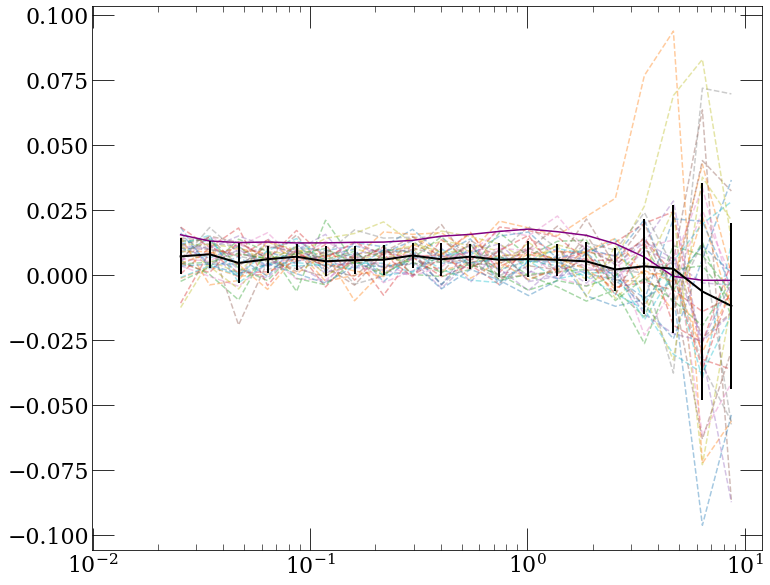

In [124]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)


#mxxl all
x_axis1,y_axis1 = create_axes(wtheta_all[0])
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-36)')


for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')

    
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)

plt.xscale('log')


x_axis,y_axis = create_axes(p)
plt.plot(x_axis,y_axis,color='purple')


plt.xscale('log')


In [27]:
np.save('wtheta_main_mock',p)